Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 62
Graphical Representation : 
 [25.  9.  1.  1.  9. 25.]


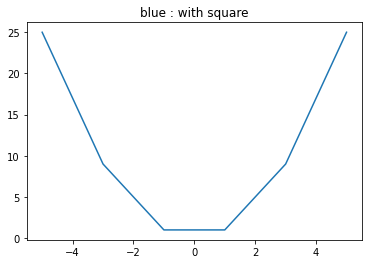

[21.39037037 21.39037037 21.39037037 21.39037037 30.20681818 30.20681818
 47.58333333 13.8        21.39037037 21.39037037 30.20681818 30.20681818]
Graphical Representation : 
 [1307716.29541502  852316.29541502  498116.29541502  245116.29541502
   93316.29541502   42716.29541502   93316.29541502  245116.29541502
  498116.29541502  852316.29541502 1307716.29541502]


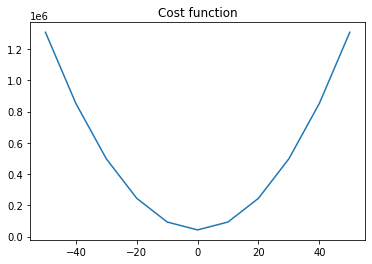

Optimization terminated successfully.
         Current function value: 42716.295415
         Iterations: 32
         Function evaluations: 66
Le coût est de 42721.355415019774
Optimization terminated successfully.
         Current function value: 42716.295415
         Iterations: 17
         Function evaluations: 35
Le minimum de la fonction de coût est atteint en [-1.44958496e-07]


4.553999999999955e+55

In [99]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from scipy.optimize import minimize

# Tuto
# Tirage aléatoire de 5 entiers compris entre 0 et 10
np.random.randint(low=0, high=10, size=5)

# Tuto
# sequence
np.arange(0, 5, 0.5, dtype=float)
rho = np.arange(0,1.1,0.1)
rho

# Tuto
# convert name to function
# h = 'DecisionTreeRegressor(random_state=0)'
# reg_tree = vars()[h]

# Tuto
# Fonction argmin qui trouve un minimum (fonction convexe)
# Exemple:
# NB: il faut ajouter le .x à la fin pour avoir l'argmin
def carre(x):
    return x**2
x0=-1
minimize(carre, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True}).x

# Tuto: np.linspace pour tracer des graphes
a = np.linspace(start = -5, stop = 5, num = 6, endpoint = True)

print("Graphical Representation : \n", np.square(a))
 
plt.title("blue : with square")
plt.plot(a, np.square(a))
plt.show()

#This uses the same mechansims. 
%matplotlib inline

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

K=1
y = 'MEDV'
weight = np.ones(K).reshape(K,1)
model = dict()
predict = dict()
x_samp = [None]*K
y_samp = [None]*K
for k in range(K):
    rand_index = np.random.randint(low=0, high=df.shape[0], size=round(df.shape[0]*0.8))
    rand_cols = np.random.randint(low=0, high=df.drop(y, axis=1).shape[1], size=round(df.drop(y, axis=1).shape[1]*0.8))
    x_samp[k] = df.drop(y,axis=1).loc[rand_index, :]
    x_samp[k] = x_samp[k].iloc[:, rand_cols]
    y_samp[k] = df.loc[rand_index, y]
    regression_tree = DecisionTreeRegressor(max_depth=2)
    model[k] = regression_tree.fit(x_samp[k], y_samp[k])
    predict[k] = model[k].predict(x_samp[k])
    print(predict[k][:12])

def qloss(p, v):
    '''Function that returns the quadratic loss'''
    return sum((p-v)**2)

def qloss_best_cst(y):
    '''Function that returns the constant that Minimize the quadratic loss'''
    n = len(y)
    s = sum(y)
    return np.ones(len(y))*s/n

def mrisk(rho, g= qloss_best_cst(df['MEDV']), f=np.ones(len(df['MEDV'])), y = df['MEDV']):
    return qloss(g + rho*f, y)

qloss(np.ones(3),0.1*np.ones(3))

rho = np.linspace(start = -50, stop = 50, num = 11, endpoint = True)
mr = np.ones(len(rho))
for i,r in enumerate(rho):
    mr[i] = mrisk(r)
print("Graphical Representation : \n", mr)
plt.title("Cost function")
plt.plot(rho, mr)
plt.show()

x0=-1
minimize(mrisk, x0, method='nelder-mead',  args=(qloss_best_cst(df['MEDV']), np.ones(len(df['MEDV'])), df['MEDV']), options={'xatol': 1e-8, 'disp': True}).x

# mloss = np.ones(len(np.arange(0,1.1,0.1)))
# for i, rho in enumerate(np.arange(0,1.1,0.1)):
#   mloss[i] = mrisk(rho=rho, g= qloss_best_cst(df['MEDV']), f=np.ones(len(df['MEDV'])), y = df['MEDV'])
# plt.plot(np.arange(0,1.1,0.1), mloss)
# plt.show()

# https://docs.scipy.org/doc/scipy/tutorial/optimize.html

print('Le coût est de {}'.format(mrisk(rho=0.1, g= qloss_best_cst(df['MEDV']), f=np.ones(len(df['MEDV'])), y = df['MEDV'])))
x0 = 0 # initialisation de la suite
print('Le minimum de la fonction de coût est atteint en {}'.format(minimize(mrisk, x0, method='nelder-mead',  args=(qloss_best_cst(df['MEDV']), np.ones(len(df['MEDV'])), df['MEDV']), options={'xatol': 1e-8, 'disp': True}).x))
mrisk(rho=-3e+26, g= qloss_best_cst(df['MEDV']), f=np.ones(len(df['MEDV'])), y = df['MEDV'])

In [108]:
class GradientBoosting():
    def __init__(self, max_depth=2, K=4):
        self.max_depth = max_depth
        self.model = dict()
        self.preds = dict()
        self.resid = dict()
        self.K = K

    def qloss(self, y):
        '''Function that returns the quadratic loss'''
        # return np.dot(np.array(y).T, self.pred)
        return (1/len(y))*0.5*sum((y-self.pred)**2)
    
    def qloss_d(self, y):
        '''Function that returns the derivative quadratic loss'''
        return 2*(y - self.pred)
    
    def qloss_best_cst(self, y):
        '''Function that returns the constant that Minimize the quadratic loss'''
        n = len(y) 
        s = sum(y)
        return np.ones(len(y))*s/n
    
    def bagging(self, x=None, y=None):
        '''Fonction that returns une liste obtenue par bagging de K arbres'''
        # Initialisation des poids
        weight = np.ones(self.K).reshape(self.K,1)
        #model = dict()
        #preds = dict()
        x_samp = [None]*self.K
        y_samp = [None]*self.K
        for k in range(self.K):
            rand_index = np.random.randint(low=0, high=x.shape[0], size=round(x.shape[0]*0.8))
            rand_cols = np.random.randint(low=0, high=len(y), size=round(len(y)*0.8))
            x_samp[k] = x.loc[rand_index, :]
            # On conserve les features initiales (pas de tirage aléatoire des colonnes)
            #x_samp[k] = x_samp[k].iloc[:, rand_cols]
            y_samp[k] = y[rand_index]
            reg_tree = DecisionTreeRegressor(random_state=0)
            self.model[k] = reg_tree.fit(x_samp[k], y_samp[k])
            #self.preds[k] = self.model[k].predict(x_samp[k])
        return self.model
    
    def predict_ens(self, x):
        '''
        This function returns the prediction for a given X feature dataset.
        Note: The prediction is stored as a global class variable "self.pred"
        to call it with quadratic loss functions
        '''
        self.pred = np.ones([x.shape[0]])
        for k in range(self.K):
            self.pred += self.model[k].predict(x)
            self.pred /= self.K
        return self.pred

    def mrisk(self, rho, g,f):
        v = g + rho*f
        return self.qloss(v)
    
    def GradientBoosting(self, x, y):
        '''Function that return the GradientBoosting model'''
        r = dict()
        f = dict()
        pred = dict()
        reg_tree = dict()
        
        # Initialisation du modèle par la constante
        self.model[0] = self.qloss_best_cst(y)
        
        # Calcul du 1er résidu
        self.resid = y - self.model[0]

        for k in range(1,self.K+1):
            
            # Apprendre le modèle fk sur l'ensemble (x, r):
            reg_tree = DecisionTreeRegressor(max_depth = self.max_depth, random_state=0)
            
            self.model[k] = reg_tree.fit(x, self.resid)
            
            pred = self.model[k].predict(x)
            
            # Calculer l'argmin rho de la fonction quadratique:
            x0=-1
            rho = minimize(self.mrisk, x0, method='nelder-mead',  args=(self.qloss_best_cst(y), pred), options={'xatol': 1e-8, 'disp': True}).x

            pred = self.qloss_best_cst(y) + rho * np.sum([self.model[k].predict(x) for i in range(1, k+1)], axis=0)

            # Mise à jour des nouveaux résidus
            self.resid = y - pred
            
        return self.model

grb = GradientBoosting()
grb.bagging(x=df.drop('MEDV', axis=1), y=df['MEDV'])
grb.predict_ens(df.drop('MEDV', axis=1))
grb.qloss(df['MEDV'])
grb.qloss_d(df['MEDV'])
grb.qloss_best_cst(df['MEDV'])
grb.mrisk(rho=0.2, g= np.ones(len(df['MEDV']))*np.mean(df['MEDV']), f=np.ones(len(df['MEDV'])))
x0=-1
minimize(grb.mrisk, x0, method='nelder-mead',  args=(np.ones(len(df['MEDV']))*np.mean(df['MEDV']), np.ones(len(df['MEDV']))), options={'xatol': 1e-8, 'disp': True}).x
grb.GradientBoosting(x=df.drop('MEDV', axis=1), y=df['MEDV'])

Optimization terminated successfully.
         Current function value: 4.340388
         Iterations: 39
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 115.773745
         Iterations: 32
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 115.986477
         Iterations: 32
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 115.853075
         Iterations: 33
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 116.892968
         Iterations: 32
         Function evaluations: 67


{0: array([22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
        22.53280632, 22.53280632, 22.53280632, 2

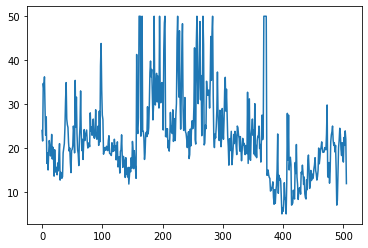

In [106]:
plt.plot(df['MEDV'])
plt.show()

<AxesSubplot:>

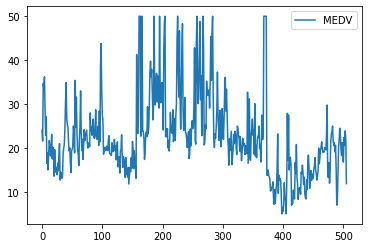

In [109]:
df.plot(y='MEDV', use_index=True)

/Users/davidtbo/work/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


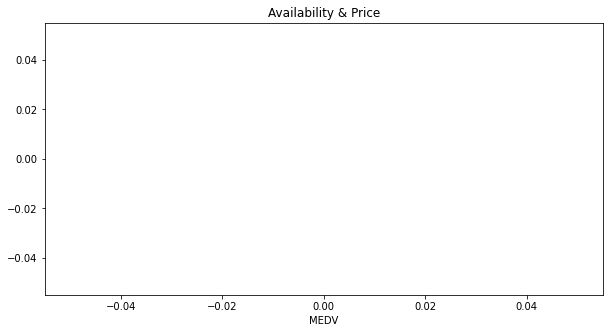

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title('Availability & Price')
sns.scatterplot(df['MEDV'])
plt.show()